In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Conv layer 1

In [3]:
# input placeholders
X = tf.placeholder(tf.float32, shape=[None, 28 * 28])
X_img = tf.reshape(X, [-1, 28, 28, 1])  #img 28 x 28 x 1 (black/white)
Y = tf.placeholder(tf.float32, shape=[None, 10])

# L1 ImgIn shape=[?, 28, 28, 1]
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))  # 3 x 3 색깔은 하나 @ 32 filters
print(W1)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding="SAME")  # convolution layers(weight 곱한 형태), 인풋이미지와 같은 사이즈
print(L1)
L1 = tf.nn.relu(L1)
print(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  # 반으로 줄인 사이즈 ?, 14, 14, 1
print(L1)

Instructions for updating:
Colocations handled automatically by placer.
<tf.Variable 'Variable:0' shape=(3, 3, 1, 32) dtype=float32_ref>
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


### Conv layer2

In [4]:
# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))  # 3 x 3 32개 색 @ 64 filters
print(W2)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')  # ? 14, 14, 64
print(W2)
L2 = tf.nn.relu(L2)
print(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') # ?, 7, 7, 64
print(L2)
L2 = tf.reshape(L2, [-1, 7 * 7 * 64])  # for fully connected layer

<tf.Variable 'Variable_1:0' shape=(3, 3, 32, 64) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(3, 3, 32, 64) dtype=float32_ref>
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


### Fully Connected layer(FC, Dense layer)

In [5]:
# Final FC 7 x 7 x 64 inputs -> 10 inputs
W3_size = L2.shape[1]
print(W3_size)
W3 = tf.get_variable("W3", shape=[W3_size, 10], initializer=tf.contrib.layers.xavier_initializer())  # weight 초기값 xavier 방법 설정
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b

# define cost/loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

3136


In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 100
num_epochs = 15
num_iterations = int(mnist.train.num_examples / batch_size)

for epoch in range(num_epochs):
    avg_cost = 0
    
    for i in range(num_iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / num_iterations
    
    print("Epoch:", "%04d" % (epoch + 1), "Cost:", "%.9f" % (avg_cost))

Epoch: 0001 Cost: 0.147327252
Epoch: 0002 Cost: 0.051119460
Epoch: 0003 Cost: 0.038677091
Epoch: 0004 Cost: 0.030593015
Epoch: 0005 Cost: 0.028235704
Epoch: 0006 Cost: 0.024724376
Epoch: 0007 Cost: 0.024477969
Epoch: 0008 Cost: 0.020663796
Epoch: 0009 Cost: 0.020871267
Epoch: 0010 Cost: 0.024781698
Epoch: 0011 Cost: 0.018642781
Epoch: 0012 Cost: 0.016119871
Epoch: 0013 Cost: 0.016837329
Epoch: 0014 Cost: 0.018158276
Epoch: 0015 Cost: 0.018436751


In [7]:
# Accuray computation
correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

print("Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.985


In [10]:
# Get one and predict
idx = np.random.choice(mnist.test.num_examples, 1)[0]
label = sess.run(tf.argmax(mnist.test.labels[idx:idx+1], 1))
predict = sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[idx:idx+1]})
print("Label:", label, "Prediction:", predict)

Label: [3] Prediction: [3]


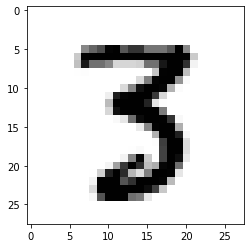

In [12]:
plt.imshow(mnist.test.images[idx:idx+1].reshape(28, 28), cmap='Greys', interpolation="nearest")
plt.show()